# IMPORTING  LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# READING CSV FILE

In [3]:
df=pd.read_csv('heart.csv')

# COLOUMS IN THE CSV FILE

In [4]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


# DECLARING DEPENDENT AND INDEPENDENT VARIABLE

In [5]:
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[feature_names]
y = df.target

# IMPORTING LIBRARIES FOR ML ALGOS

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# CHECKING WHICH ALGO IS BETTER

In [7]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT',DecisionTreeClassifier()))


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# SPLITTING DATASET INTO TRAINING AND TESTING

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df.target, random_state=0)


In [10]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.697368
1  SVC  0.552632
2   LR  0.881579
3   DT  0.763158
4  GNB  0.842105
5   RF  0.802632
6   DT  0.750000


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print(classification_report(y_test,y_pred))

[[25 10]
 [ 9 32]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        35
           1       0.76      0.78      0.77        41

   micro avg       0.75      0.75      0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



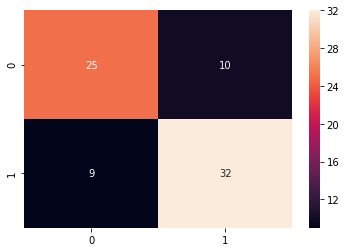

In [13]:
import seaborn as sn
sn.heatmap(matrix, annot=True)
plt.show()

In [18]:
 pip install pandas==0.23.4

  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
Note: you may need to restart the kernel to use updated packages.


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\admin\\anaconda3\\lib\\site-packages\\~andas\\io\\msgpack\\_packer.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# CODE FOR TKINTER 

In [53]:
from tkinter import *
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestClassifier


def prediction_model():
    x = [[int(entry_1.get()), int(entry_2.get()), int(entry_3.get()), int(entry_4.get()), int(entry_5.get()), int(entry_6.get()), int(entry_7.get()), int(entry_8.get()), int(entry_9.get()), float(entry_10.get()), int(entry_11.get()), int(entry_12.get()), int(entry_13.get())]]
    #randomforest = pickle.load(open('model.sav', 'rb'))
    predictions = randomforest.predict(x)
    if predictions==0:
        myText.set('  😄 Less chance of Heart Stroke  😄 ')
    else:
        myText.set('High chance of Heart Stroke.Take Care')


In [55]:

predictors = df.drop(['target'], axis=1)
target = df["target"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)



win=Tk()
win.geometry("550x780")
win.title("Heart Stroke Predictor")
win['background']='yellow'
regTitle=Label(win,text="Patient Details",width=20,font=("bold",30),bg='yellow',fg='black')
age=name=Label(win,text="Age:",width=50,font=("bold",13),bg='yellow')
sex=Label(win,text="Sex(0=Male,1=Female):",width=50,font=("bold",13),bg='yellow')
cp=Label(win,text="Chest pain type(0,1,2,3):",width=50,font=("bold",13),bg='yellow')
trestbps=Label(win,text="Resting blood pressure:",width=50,font=("bold",13),bg='yellow')
chol=Label(win,text="Serum cholestoral in mg/dl:",width=50,font=("bold",13),bg='yellow')
fbs=Label(win,text="Fasting blood sugar > 120 mg/dl:",width=50,font=("bold",13),bg='yellow')
restecg=Label(win,text="Resting electrocardiographic results (values 0,1,2):",width=50,font=("bold",13),bg='yellow')
thalach=Label(win,text="Maximum heart rate achieved:",width=50,font=("bold",13),bg='yellow')
exang=Label(win,text="Exercise induced angina:",width=50,font=("bold",13),bg='yellow')
oldpeak=Label(win,text="Oldpeak:",width=50,font=("bold",13),bg='yellow')
slope=Label(win,text="The slope of the peak exercise ST segment:",width=50,font=("bold",13),bg='yellow')
ca=Label(win,text="Number of major vessels (0-3) colored by flourosopy:",width=50,font=("bold",13),bg='yellow')
thal=Label(win,text="thal( 0 = normal; 1 = fixed defect; 2 = reversable defect):",width=50,font=("bold",13),bg='yellow')

entry_1=Entry(win,width=10)
entry_2=Entry(win,width=10)
entry_3=Entry(win,width=10)
entry_4=Entry(win,width=10)
entry_5=Entry(win,width=10)
entry_6=Entry(win,width=10)
entry_7=Entry(win,width=10)
entry_8=Entry(win,width=10)
entry_9=Entry(win,width=10)
entry_10=Entry(win,width=10)
entry_11=Entry(win,width=10)
entry_12=Entry(win,width=10)
entry_13=Entry(win,width=10)

regTitle.grid(row=0,pady=10)
age.grid(row=2, pady=10)
sex.grid(row=4, pady=10)
cp.grid(row=6, pady=10)
trestbps.grid(row=8, pady=10)
chol.grid(row=10, pady=10)
fbs.grid(row=12, pady=10)
restecg.grid(row=14, pady=10)
thalach.grid(row=16, pady=10)
exang.grid(row=18, pady=10)
oldpeak.grid(row=20, pady=10)
slope.grid(row=22, pady=10)
ca.grid(row=24, pady=10)
thal.grid(row=26, pady=10)
entry_1.grid(row=2,column=1, pady=10)
entry_2.grid(row=4,column=1, pady=10)
entry_3.grid(row=6,column=1, pady=10)
entry_4.grid(row=8,column=1, pady=10)
entry_5.grid(row=10,column=1, pady=10)
entry_6.grid(row=12,column=1, pady=10)
entry_7.grid(row=14,column=1, pady=10)
entry_8.grid(row=16,column=1, pady=10)
entry_9.grid(row=18,column=1, pady=10)
entry_10.grid(row=20,column=1, pady=10)
entry_11.grid(row=22,column=1, pady=10)
entry_12.grid(row=24,column=1, pady=10)
entry_13.grid(row=26,column=1, pady=10)

myText = StringVar();
but = Button(win, text="Predict",width=20,font=("bold",13),bg='black',fg='white', command=prediction_model)
but.grid(row=28,columnspan=2, pady=10)
result = Label(win, text="",width=50,font=("bold",25), textvariable=myText,bg='yellow',fg='black').grid(row=29)

win.mainloop()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
